In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [69]:
df = pd.read_csv('logs\\queue-stats-2016-12-20-17-59-08.csv')  # without queue
# df = pd.read_csv('logs\\queue-stats-2016-12-20-19-14-08.csv')  # with queue
df.head(9)

,Unnamed: 0,PART,SCALE,Q1,Q3,AVG,N_SURG,Q2,MAX,MIN
0,0,0.481308,0.5,24.20,123.00,93.873786,1,60.0,488,1
1,1,0.504132,0.5,30.00,165.05,156.819672,1,76.0,1306,2
2,2,0.521739,0.5,28.45,239.95,249.992424,1,69.0,1939,1
3,3,0.518939,0.5,27.00,115.90,150.357664,1,62.0,1615,1
4,4,0.415888,0.5,33.00,111.40,131.955056,1,60.0,1169,1
5,5,0.561086,0.5,30.00,205.50,158.451613,1,81.5,1360,1
6,6,0.454106,0.5,25.95,126.60,122.595745,1,51.0,1120,1
7,7,0.435484,0.5,31.70,137.20,116.530864,1,53.0,661,2
8,8,0.431624,0.5,25.00,80.20,70.584158,1,42.0,371,3


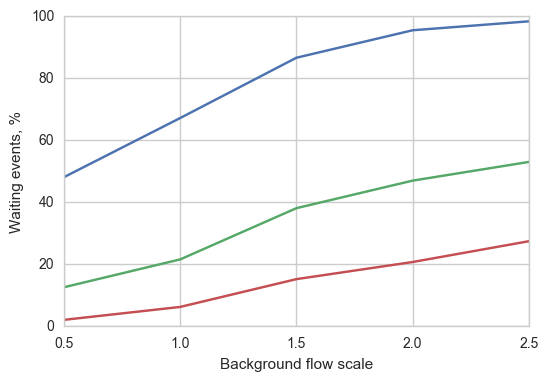

In [70]:
x = df[df.N_SURG == 1].sort_values('SCALE').SCALE.unique()
plt.plot(x, df[df.N_SURG == 1].groupby('SCALE')['PART'].mean() * 100.0)
plt.plot(x, df[df.N_SURG == 2].groupby('SCALE')['PART'].mean() * 100.0)
plt.plot(x, df[df.N_SURG == 3].groupby('SCALE')['PART'].mean() * 100.0)
plt.xlabel('Background flow scale')
plt.ylabel('Waiting events, %')

(0, 500)

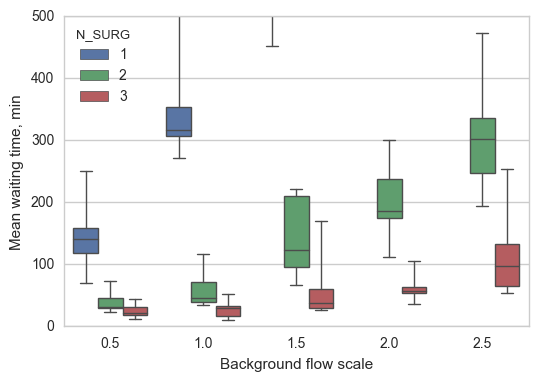

In [76]:
sns.boxplot(x='SCALE', y='AVG', data=df, hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Background flow scale')
plt.ylabel('Mean waiting time, min')
plt.ylim((0, 500))

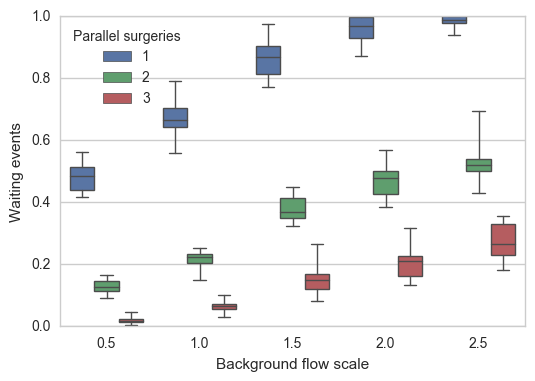

In [74]:
sns.boxplot(x='SCALE', y='PART', data=df, hue='N_SURG', width=0.8, linewidth=1, whis='range')
plt.xlabel('Background flow scale')
plt.ylabel('Waiting events')
plt.legend(loc=2, title='Parallel surgeries')

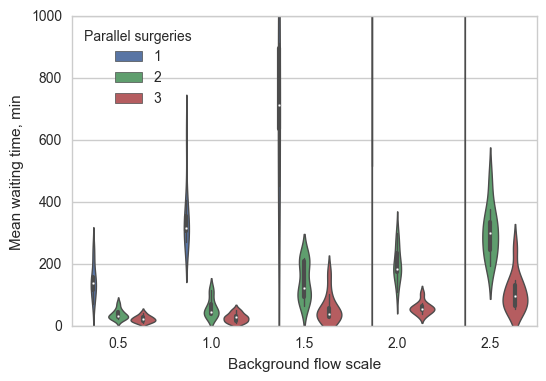

In [75]:
sns.violinplot(x='SCALE', y='AVG', data=df, hue='N_SURG', linewidth=1)
plt.xlabel('Background flow scale')
plt.ylabel('Mean waiting time, min')
plt.ylim((0, 1000))
plt.legend(loc=2, title='Parallel surgeries')

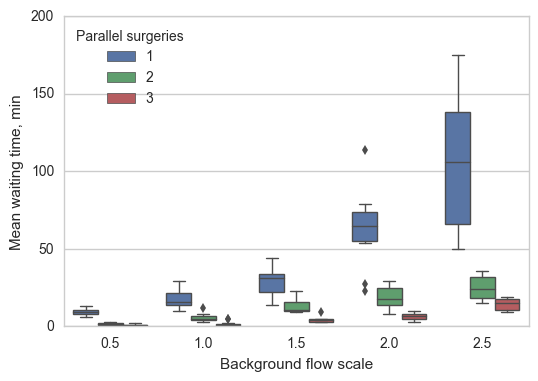

In [68]:
sns.boxplot(x='SCALE', y='MAX_QUEUE_LENGTH', data=df, hue='N_SURG', linewidth=1)
plt.xlabel('Background flow scale')
plt.ylabel('Mean waiting time, min')
plt.ylim((0, 200))
plt.legend(loc=2, title='Parallel surgeries')